# Primates Morphology

The `primates-morphology.csv` file contains **coordinates** derived from markers of skull features from various species of primates. 

**Goal**: Read the data and use unsupervised machine learning methods to separate the groups beloning to different species.

**Assessment**:
- Conduct critical research:
    - excellent use of research methodologies.
    - excellent use of design methodologies.
    - clear and validated design.
    - critical attitude towards own results, literature and specialists.
    - detailed interpretation and verification of the results.
    - conclusions are based on the resutls in a clear way.
    - conclusions are extrapolated to a wider context.
- Model mearningful information
    - results are extracted from correct analysis of data.
    - used algorithms are (cross) validated, evaluated and optimized. 
        - <span style="color:blue">TSNE hyperparam tuning</span>
    - outcome of research enhances knowledge of the topic.
- Deliver organized results:
    - code according to coding style
    - code is easy to read
        - - <span style="color:blue">config.yaml</span>
    - code is stored in a separate repository
    - repo contains a readme with complete instructions and version information.
    - repo contains license.
    
**Must haves**:
- A good working method and a non-working approach with explanation why it does or doesn't work.

-------------


# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading file

In [2]:
df = pd.read_csv('../data/primates-morphology.csv').drop(columns='Unnamed: 0')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [3]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A
164,-88.663448,-43.835382,74.681197,19.086880,9.755993,-9.499983,2.948722,-2.992005,-0.666312,0.333317,...,0.141954,-0.947492,0.060862,-0.297479,0.723835,Hl,Hylobates,lar,F,A


# Exploration

In [4]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', 'Abbreviation', 'Genus', 'Species', 'Sex',
       'Age'],
      dtype='object')

The goal is to separate the species using clustering. For this reason, only the coordinates and the `Species` columns are important. We do not need the rest.

In [5]:
X = df.iloc[:, :30]
y = df['Species']

Create a count plot to investigate the number of species

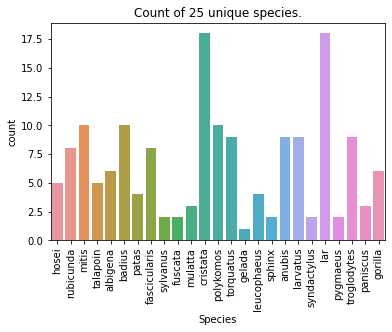

cristata        18
lar             18
polykomos       10
mitis           10
badius          10
troglodytes      9
larvatus         9
anubis           9
torquatus        9
fascicularis     8
rubicunda        8
gorilla          6
albigena         6
talapoin         5
hosei            5
leucophaeus      4
patas            4
mulatta          3
paniscus         3
fuscata          2
sphinx           2
sylvanus         2
syndactylus      2
pygmaeus         2
gelada           1
Name: Species, dtype: int64

In [8]:
sns.countplot(x=y, label='Count')
plt.title(f'Count of {len(y.unique())} unique species.')
plt.xticks(rotation=90)
plt.show()

y.value_counts()

There are 25 different species in total. The dataset is imbalanced which can influence the clustering results. It may be possible that a certain algorithm is not able to find a class. Also, tricks for oversampling are highly data dependent. This means that oversampling gelada will not work. This will be an obstacle in achieving optimal performance.

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       165 non-null    float64
 1   1       165 non-null    float64
 2   2       165 non-null    float64
 3   3       165 non-null    float64
 4   4       165 non-null    float64
 5   5       165 non-null    float64
 6   6       165 non-null    float64
 7   7       165 non-null    float64
 8   8       165 non-null    float64
 9   9       165 non-null    float64
 10  10      165 non-null    float64
 11  11      165 non-null    float64
 12  12      165 non-null    float64
 13  13      165 non-null    float64
 14  14      165 non-null    float64
 15  15      165 non-null    float64
 16  16      165 non-null    float64
 17  17      165 non-null    float64
 18  18      165 non-null    float64
 19  19      165 non-null    float64
 20  20      165 non-null    float64
 21  21      165 non-null    float64
 22  22

There are no missing coordinates.